# Introduction
In the lab we investigated the behaivor of series RLC Circuits. We constructed a series RLC circuit with a 0.1&#956;F capacitor a 88 mH Inductor and a resistor. The resistance was adjusted inorder to determine the response of the circuit when it is over damped critically damped and under damped. 
# Procedure
## Part 1
    In part 1 we constructed a circuit with an overdamped response. The response was measured with an osciliscope and included with the lab report
## Part 2
In part 2 we constructed two circuits one with a slightly over damped response and the other with an under damped response. The critical response was then estimated. 

## Part 3
In part 3 we constructed a circuit with a under damped response and measured the response with an osciliscope
## Part 4
In part 4 the theoritical response was determined and compared to the measured responses



# Discussion

## Part 1
    We used a 10 kOhm resistor inorder to create an overdamped response.
    ### Talk about how calculated resistance
    ### Include Table of data
    ### Figure of data

In [1]:
#make_part_1_graph()

Discussion of part 1 graph
## Part 2
### include two graphs

In [2]:
def plot_osc(f_name,title,col_1="",col_2=""):
    temp = np.loadtxt(f_name,skiprows=4,delimiter=',')
    print(temp)
    print(temp.shape)
    in_signal = np.vstack((temp[:,0],temp[:,1]))
    out_signal = np.vstack((temp[:,0],temp[:,2]))
    print(temp[:,1])
    plt.scatter(in_signal[0],in_signal[1],label=col_1)
    plt.scatter(out_signal[0],out_signal[1],label=col_2)
    plt.xlim(min(in_signal[0,:]),max(in_signal[0,:]))
    ticks_dist = -(min(in_signal[0])-max(in_signal[0]))/5.0
    plt.xticks(np.arange(min(in_signal[0]),max(in_signal[0]),ticks_dist))
    plt.xlabel("Seconds")
    plt.ylabel("Volts")
    plt.title(title)
    legend = plt.legend()
    plt.show()

In [3]:
def plot_osc_2_scale(f_name,title,col_1="",col_2="",flipped=False):
    temp = np.loadtxt(f_name,skiprows=4,delimiter=',')
    #print(temp)
    #print(temp.shape)
    in_signal = np.vstack((temp[:,0],temp[:,1]))
    out_signal = np.vstack((temp[:,0],temp[:,2]))
    if(flipped==True):
        in_signal= np.vstack((temp[:,0],temp[:,2]))
        out_signal= np.vstack((temp[:,0],temp[:,1]))
    #print(temp[:,1])
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel("time (s)")
    ax1.set_ylabel("Input signal (V)",color="tab:blue")
    ax1.plot(in_signal[0],in_signal[1],label=col_1,color="tab:blue")
    
    
    ax2=ax1.twinx()
    ax2.plot(out_signal[0],out_signal[1],label=col_2,color="tab:red")
    plt.xlim(min(in_signal[0,:]),max(in_signal[0,:]))
    ticks_dist = -(min(in_signal[0])-max(in_signal[0]))/5.0
    plt.xticks(np.arange(min(in_signal[0]),max(in_signal[0]),ticks_dist))
    ax2.set_ylabel("Output signal (V)",color="tab:red")
    #plt.xlabel("Seconds")
    #plt.ylabel("Volts")
    plt.title(title)
    #legend = plt.legend()
    
    fig.tight_layout()
    plt.show()

In [4]:
def plot_eq(f_name,equation,title,col_1="",col_2="",flipped=False):
    temp = np.loadtxt(f_name,skiprows=4,delimiter=',')
    #print(temp)
    #print(temp.shape)
    in_signal = np.vstack((temp[:,0],temp[:,1]))
    out_signal = np.vstack((temp[:,0],temp[:,2]))
    print(in_signal.shape)
    equation_data = np.zeros(in_signal.shape[1])
    i=0;
    for x in in_signal[0,:]:
            equation_data[i]=equation(x)
            i+=1

            
        #print(x)
    print(equation_data)
    if(flipped==True):
        in_signal= np.vstack((temp[:,0],temp[:,2]))
        out_signal= np.vstack((temp[:,0],temp[:,1]))
    #print(temp[:,1])
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel("time (s)")
    ax1.set_ylabel("Input signal (V)",color="tab:blue")
    ax1.plot(in_signal[0],in_signal[1],label=col_1,color="tab:blue")
    
    
    ax2=ax1.twinx()
    ax2.plot(out_signal[0],out_signal[1],label=col_2,color="tab:red")
    plt.xlim(min(in_signal[0,:]),max(in_signal[0,:]))
    ticks_dist = -(min(in_signal[0])-max(in_signal[0]))/5.0
    plt.xticks(np.arange(min(in_signal[0]),max(in_signal[0]),ticks_dist))
    ax2.set_ylabel("Output signal (V)",color="tab:red")
    
    
    
    ax2.plot(out_signal[0],equation_data,color="tab:orange")
    #plt.xlabel("Seconds")
    #plt.ylabel("Volts")
    plt.title(title)
    #legend = plt.legend()
    
    fig.tight_layout()
    plt.show()

In [5]:
def calc_over(R,L,C,t):
    t=Decimal(t)
    R = Decimal(R)
    L = Decimal(L)
    C = Decimal(C)
    print(R)
    print(L)
    print(C)
    a=R/(Decimal(2.0)*L)
    w=Decimal(1)/Decimal.sqrt(L*C)
    print(a)
    print(w)
    
    
    s1=-a+Decimal.sqrt(a**Decimal(2)-w**Decimal(2))
    s2=-a-Decimal.sqrt(a**Decimal(2)-w**Decimal(2))
    A1=Decimal(-2.0)/(L*s1-s2)
    A2=Decimal(2.0)/(L*s1-s2)
    out =  (A1*s1*Decimal.exp(s1*t)+A2*s2*Decimal.exp(s2*t))/L
    #print("ran calc_over")
    #print(out)
    return float(out)

def calc_over_2(R,L,C,t):

    print(R)
    print(L)
    print(C)
    a=R/(2.0*L)
    w=1/(L*C)
    print(a)
    print(w)
    
    
    s1=-a+math.sqrt(a**2-w**2)
    s2=-a-Decimal.sqrt(a**Decimal(2)-w**Decimal(2))
    A1=Decimal(-2.0)/(L*s1-s2)
    A2=Decimal(2.0)/(L*s1-s2)
    out =  (A1*s1*Decimal.exp(s1*t)+A2*s2*Decimal.exp(s2*t))/L
    #print("ran calc_over")
    #print(out)
    return float(out)

In [6]:
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from decimal import *
mpl.rcParams['figure.dpi'] = 500

In [7]:
calc_over(29.96e3,88e-3,99.6e-9,0)
calc_over_2(29.96e3,88e-3,99.6e-9,0)

(2, 1998)
[0. 0. 0. ... 0. 0. 0.]


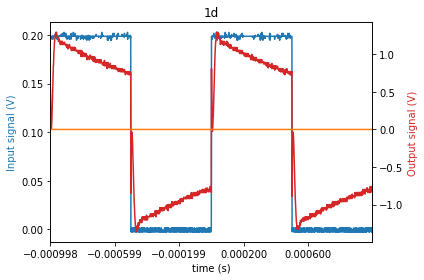

In [8]:
def eq(x):
    x=x+0.000998
    return (2.948*10**-3)*math.exp(-335.0*x)+(-2.99)*math.exp(-34016.0*x)
def eq2(t):
    return 0
    return calc_over(10000,0.088,'99.6E-9',t)
plot_eq("scope_8.csv",eq2,
"1d",flipped=True)

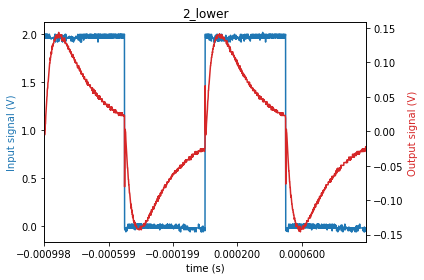

-14.846926992266988
(2, 1998)
[-34.1        -33.86282839 -33.62752798 ...  20.95421204  21.15319455
  21.35101307]


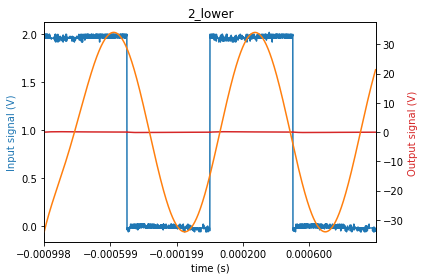

In [9]:
plot_osc_2_scale("/home/nick/sshfs/Documents/lab07/scope_10.csv","2_lower")
def eq(t):
    t=t+0.000998
    return 32.1*math.exp(-7936.0*t)*math.sin(7418.0*t)-34.1*math.cos(7418.0*t)
print(eq(0.0))
plot_eq("scope_10.csv",eq,"2_lower")

(2, 1998)
[-387.333375   -346.81640584 -310.49810028 ...    0.46546487    0.46497965
    0.46449492]


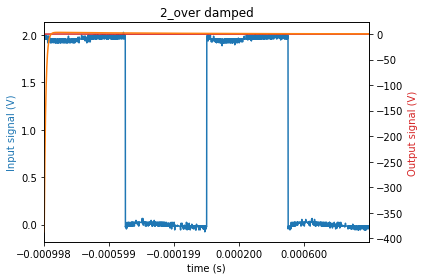

In [10]:

def eq(t):
    t=t+0.000998
    return 0.003575*(1043*math.exp(-1043*t)-109388*math.exp(-109388*t))

plot_eq("scope_11.csv",eq,
"2_over damped")

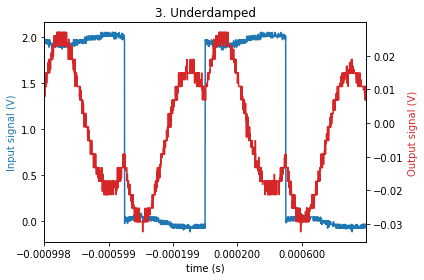

In [11]:

plot_osc_2_scale("scope_14.csv",
"3. Underdamped")